# Assignment 2 : Text classification using Advanced ML methods

## I: Data Loading and Exploaration

In [91]:
# all the necessary libraries have been imported here

import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import string
import time
import nltk
import re
import matplotlib.pyplot as plt
import os, re, io, zipfile, json, urllib.request
from pathlib import Path
from collections import Counter

# Sklearn libraries for machine learning and text processing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict,cross_val_score,cross_validate,validation_curve,learning_curve,StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, chi2




# NLTK libraries for text processing (lemmatization, stemming, stopwords, POS tagging)
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag
from itertools import product

# Download necessary NLTK resources for text processing
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Open Multilingual Wordnet
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords for text cleaning
nltk.download('averaged_perceptron_tagger')  # POS tagger for part-of-speech tagging
nltk.download('tagsets_json')  # Tagset resource


import torch
from torch.utils.data import Dataset, DataLoader
import torch, torch.nn as nn, torch.nn.functional as F



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NikoBelin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\NikoBelin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NikoBelin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NikoBelin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NikoBelin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets_json to
[nltk_data]     C:\Users\NikoBelin\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets_j

In [92]:
# Train and test data loaded here
# df_train = pd.read_excel("..Data/AI_vs_huam_train_dataset.xlsx")
# df_test = pd.read_csv("...Data/Final_test_data.csv")

df_train = pd.read_excel("../Data/AI_vs_huam_train_dataset.xlsx", engine="openpyxl")
df_test  = pd.read_csv("../Data/final_test_data.csv")


In [93]:
# Description of the train data set which contains the count and other relevant info
df_train.describe()

,label
count,3728.000000
mean,0.500000
std,0.500067
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [94]:
# label category count of train data
df_train["label"].value_counts()

label
0    1864
1    1864
Name: count, dtype: int64

In [95]:
# sample text of the first 10 data in the train data
df_train.head(10)

,essay,label
0,International sports events require the most w...,0
1,Globalisation has become a significant aspect ...,0
2,There is an ever-increasing number of bullying...,0
3,"It is commonly believed, that companies should...",0
4,Despite knowing about the adverse effects of c...,0
5,These days the space exploration is not just a...,0
6,Regarding the suggestions that governments sho...,0
7,The ability to associate at school has been a ...,0
8,"It is true that today, people tend to give bir...",0
9,Weather to have children or not is one of the ...,0


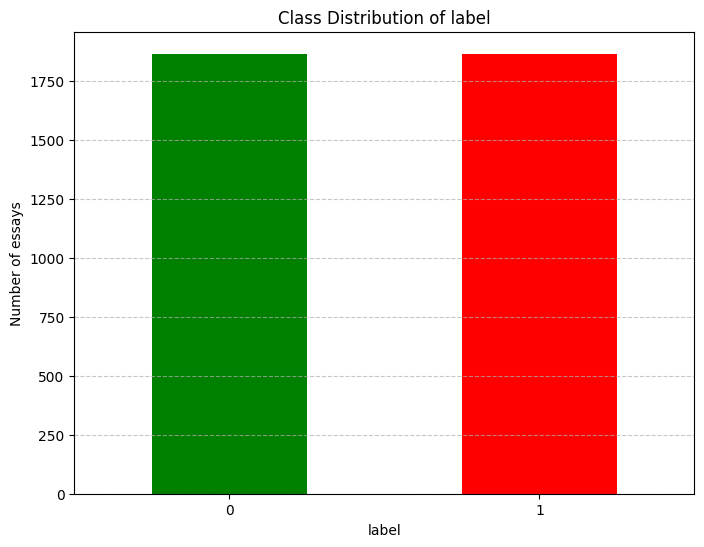

In [96]:
# A visualization of the distribution of the label category

# Count class occurrences in label category
class_counts = df_train['label'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['green', 'red'])  # Customize colors as needed
plt.title("Class Distribution of label")
plt.xlabel("label")
plt.ylabel("Number of essays")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## II : Text Preprocessing

<span style="color:blue; font-size:20px;">Removing stopWords.</span>


In [97]:
def remove_stopwords(essay):
    """
    Cleans and processes an essay string.

    This function takes a raw essay and performs several text cleaning steps:
    1. Converts to lowercase
    2. Removes punctuation
    3. Removes pure numeric and mixed alphanumeric tokens using regex
    4. Removes defined stopwords
    5. Returns the cleaned essay as a string

    Args:
        essay (str): The input essay string to be processed.

    Returns:
        str: Cleaned essay string
    """
    if not isinstance(essay, str):
        return ""

    # Define stopwords
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

    # Lowercase and remove punctuation
    essay = essay.lower()
    nopunc = ''.join([char for char in essay if char not in string.punctuation])

    # Tokenize and filter
    cleaned_tokens = []
    for word in nopunc.split():
        if re.match(r'^\d+$', word):  # Remove pure numbers
            continue
        if re.match(r'^\w*\d\w*$', word):  # Remove mixed alphanumerics
            continue
        if word in STOPWORDS:
            continue
        cleaned_tokens.append(word)

    return ' '.join(cleaned_tokens)

df_train["clean_essay"] = df_train["essay"].apply(remove_stopwords) #applying stopwords to the train data
df_test["clean_essay"] = df_test["essay"].apply(remove_stopwords)    #applying stopwords to the test data


#show the first 5 data of the train data with the new column for clean essays
df_train.head(5) 


,essay,label,clean_essay
0,International sports events require the most w...,0,international sports events require welltraine...
1,Globalisation has become a significant aspect ...,0,globalisation become significant aspect world’...
2,There is an ever-increasing number of bullying...,0,everincreasing number bullying activities nume...
3,"It is commonly believed, that companies should...",0,commonly believed companies dress code policy ...
4,Despite knowing about the adverse effects of c...,0,despite knowing adverse effects climate change...


In [98]:
#Display to show the comparison of the first 5 data before and after applying stopwords in clean data.(Examples)
df_train[['essay','clean_essay']].head(5)




,essay,clean_essay
0,International sports events require the most w...,international sports events require welltraine...
1,Globalisation has become a significant aspect ...,globalisation become significant aspect world’...
2,There is an ever-increasing number of bullying...,everincreasing number bullying activities nume...
3,"It is commonly believed, that companies should...",commonly believed companies dress code policy ...
4,Despite knowing about the adverse effects of c...,despite knowing adverse effects climate change...


In [99]:
# Tokenize each tweet by splitting on blank or space.
original_tokenized_essay = df_train['essay'].apply(lambda tweet: tweet.split()) #spliting training text without applying stopwords.
clean_tokenized_essay = df_train['clean_essay'].apply(lambda tweet: tweet.split()) #spliting training text after applying stopwords.
clean_tokenized_test_essay = df_test['clean_essay'].apply(lambda tweet: tweet.split()) #splitting the test data.


df_train['clean_tokens'] = clean_tokenized_essay  #creating a column with name "clean tokens" in training data
df_test['clean_tokens'] = clean_tokenized_test_essay   #creating a column with name "clean tokens" in test data


# Flatten the list of token lists into a single list of tokens
all_old_tokens = [word for tokens in original_tokenized_essay for word in tokens]
all_new_tokens = [word for tokens in clean_tokenized_essay for word in tokens]



old_vocab = set(all_old_tokens)
new_vocab = set(all_new_tokens)

#showing the difference vocabulary size before and after applying stop word removal.
print("Vocabulary size before stopword removal:", len(old_vocab))
print("Vocabulary size after stopword removal:", len(new_vocab))

Vocabulary size before stopword removal: 42702
Vocabulary size after stopword removal: 26300


<span style="color:blue; font-size:20px;">Stemming and lemmitaization.</span>

In [101]:
# stemming and lemmitization

def preprocess_stem(tokens):
    """
    Apply Porter Stemming to a list of tokens.

    Args:
        tokens (list): A list of word tokens (already tokenized and stopword-removed)

    Returns:
        list: Stemmed tokens
    """
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]


# Helper: Map POS tag to WordNet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default

# Main Lemmatization Function
def preprocess_lematise(tokens):
    """
    Apply lemmatization with POS tagging to a list of tokens.

    Args:
        tokens (list): Tokenized words (already cleaned and stopword-removed)

    Returns:
        list: Lemmatized tokens
    """
    lemmatizer = WordNetLemmatizer()
    pos_tags = pos_tag(tokens)
    return [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in pos_tags
    ]

df_train["stemmed_tokens"] = df_train["clean_tokens"].apply(preprocess_stem)      #applying stemming on training data
df_train["lemmatized_tokens"] = df_train["clean_tokens"].apply(preprocess_lematise)    #applying lemitiaztion on training data



df_test["lemmatized_tokens"] = df_test["clean_tokens"].apply(preprocess_lematise)     #applying lemitiaztion on test data






In [102]:
# A comparison of clean token,stemmed tokens and lemitized tokens in the firt 10 data in the training data.
df_train[['clean_tokens','stemmed_tokens','lemmatized_tokens']].head(10)



,clean_tokens,stemmed_tokens,lemmatized_tokens
0,"[international, sports, events, require, wellt...","[intern, sport, event, requir, welltrain, athl...","[international, sport, event, require, welltra..."
1,"[globalisation, become, significant, aspect, w...","[globalis, becom, signific, aspect, world’, mo...","[globalisation, become, significant, aspect, w..."
2,"[everincreasing, number, bullying, activities,...","[everincreas, number, bulli, activ, numer, sch...","[everincreasing, number, bullying, activity, n..."
3,"[commonly, believed, companies, dress, code, p...","[commonli, believ, compani, dress, code, polic...","[commonly, believe, company, dress, code, poli..."
4,"[despite, knowing, adverse, effects, climate, ...","[despit, know, advers, effect, climat, chang, ...","[despite, know, adverse, effect, climate, chan..."
5,"[days, space, exploration, imagination, since,...","[day, space, explor, imagin, sinc, human, be, ...","[day, space, exploration, imagination, since, ..."
6,"[regarding, suggestions, governments, offord, ...","[regard, suggest, govern, offord, tuition, sub...","[regard, suggestion, government, offord, tuiti..."
7,"[ability, associate, school, great, concern, o...","[abil, associ, school, great, concern, owe, as...","[ability, associate, school, great, concern, o..."
8,"[true, today, people, tend, give, birth, older...","[true, today, peopl, tend, give, birth, older,...","[true, today, people, tend, give, birth, older..."
9,"[weather, children, one, important, questions,...","[weather, children, one, import, question, you...","[weather, child, one, important, question, you..."


## III : Feature Extraction 

<span style="color:blue; font-size:20px;">All other works used the lemitized tokens</span>


In [103]:
#join the token back to form text for both train and test data.
df_train['lemmatized_text'] = df_train['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))
df_test['lemmatized_text'] = df_test['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))


#Initialize most important component in the training data(preparing for feature extraction)
X = df_train["lemmatized_text"]
y = df_train["label"]


# Split training data into train and validation sets

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)




In [104]:
# all parameters defined 
ngram_ranges = [(1,1), (1,2), (1,3)]
max_features_list = [1000, 2000, 3000]
min_df_list = [2, 5]
max_df_list = [0.75, 0.85]


results = []

# Loop over all parameter combinations
for ngram, max_feat, min_df, max_df in product(ngram_ranges, max_features_list, min_df_list, max_df_list):
    try:
    
        vectorizer = TfidfVectorizer(
            ngram_range=ngram,
            max_features=max_feat,
            min_df=min_df,
            max_df=max_df
        )
    
        X_train_tfid = vectorizer.fit_transform(X_train)
        X_val_tfid = vectorizer.transform(X_val)
        X_test_tfid =vectorizer.transform(df_test['lemmatized_text'])

    
        results.append({
            'ngram_range': ngram,
            'max_features': max_feat,
            'min_df': min_df,
            'max_df': max_df,
            'train_shape': X_train_tfid.shape,
            'val_shape': X_val_tfid.shape,
            'vocab_size': len(vectorizer.vocabulary_)
        })
    except Exception as e:
        results.append({
            'ngram_range': ngram,
            'max_features': max_feat,
            'min_df': min_df,
            'max_df': max_df,
            'error': str(e)
        })



# Convert results to DataFrame and print

results_df = pd.DataFrame(results)
print(results_df)

joblib.dump(vectorizer, '../models/tfidf_vectorizer.pkl')
print("Saved best SVM model to ../models/svm_model.pkl")



   ngram_range  max_features  min_df  max_df   train_shape    val_shape  \
0       (1, 1)          1000       2    0.75  (2982, 1000)  (746, 1000)   
1       (1, 1)          1000       2    0.85  (2982, 1000)  (746, 1000)   
2       (1, 1)          1000       5    0.75  (2982, 1000)  (746, 1000)   
3       (1, 1)          1000       5    0.85  (2982, 1000)  (746, 1000)   
4       (1, 1)          2000       2    0.75  (2982, 2000)  (746, 2000)   
5       (1, 1)          2000       2    0.85  (2982, 2000)  (746, 2000)   
6       (1, 1)          2000       5    0.75  (2982, 2000)  (746, 2000)   
7       (1, 1)          2000       5    0.85  (2982, 2000)  (746, 2000)   
8       (1, 1)          3000       2    0.75  (2982, 3000)  (746, 3000)   
9       (1, 1)          3000       2    0.85  (2982, 3000)  (746, 3000)   
10      (1, 1)          3000       5    0.75  (2982, 3000)  (746, 3000)   
11      (1, 1)          3000       5    0.85  (2982, 3000)  (746, 3000)   
12      (1, 2)          1

## III : Pipeline creation

In [105]:
# Implement GridSearch for SVM pipeline


print("Grid Search -- Support Vector Machine(SVM)")
print("-" * 45)

svm_pipeline = Pipeline([('vectorizer',TfidfVectorizer()), ('classifier',SVC(probability=True, random_state=42))])

svm_param_grid = {'vectorizer__max_features': [1000, 5000, 10000],
'vectorizer__ngram_range': [(1,1), (1,2), (1,3)],
'classifier__C': [0.1, 1, 10, 100],
'classifier__kernel': ['linear', 'rbf'],
'classifier__gamma': ['scale', 'auto', 0.001, 0.01] } # for rbf kernel







Grid Search -- Support Vector Machine(SVM)
---------------------------------------------


In [106]:
# Implement GridSearch for Decision Tree pipeline
print("Grid Search -- Decision Tree(DT)")
print("-" * 45)


dt_pipeline = Pipeline([('vectorizer',TfidfVectorizer()),('classifier',DecisionTreeClassifier())])


dt_param_grid = {'vectorizer__max_features': [1000, 5000, 10000],
'vectorizer__ngram_range': [(1,1), (1,2), (1,3)],
'classifier__criterion': ['gini', 'entropy'],
'classifier__max_depth': [10, 20, 30, None],
'classifier__min_samples_split': [2, 5, 10],
'classifier__min_samples_leaf': [1, 2, 4] }
 
   



Grid Search -- Decision Tree(DT)
---------------------------------------------


In [107]:
# Implement GridSearch for Adaboost pipeline
print("Grid Search -- Ada boost(ADA)")
print("-" * 45)


ada_pipeline = Pipeline([('vectorizer',TfidfVectorizer()),('classifier', AdaBoostClassifier())])


ada_param_grid = {
    'vectorizer__max_features': [1000, 5000, 10000],
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1,3)],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0],
}

Grid Search -- Ada boost(ADA)
---------------------------------------------


## IV : Hyperparameter Optimization

In [108]:

# Perform grid search

svm_grid_search = GridSearchCV(estimator=svm_pipeline,
                               param_grid=svm_param_grid,
                               cv=5,           
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=1,
                               return_train_score=True )


print("Performing Grid Search for support vector machine...")
start_time = time.time()
svm_grid_search.fit(X_train,y_train)
end_time = time.time()


print(f"\nGrid Search completed in {end_time - start_time:.2f} seconds")
print(f"Total parameter combinations tested: {len(svm_grid_search.cv_results_['params'])}")
print(f"Best parameters: {svm_grid_search.best_params_}")
print(f"Best cross-validation score: {svm_grid_search.best_score_:.4f}")


# Save best estimator (pipeline)
joblib.dump(svm_grid_search.best_estimator_, '../models/svm_model.pkl')

print("Saved best SVM model to ../models/svm_model.pkl")

Performing Grid Search for support vector machine...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits

Grid Search completed in 12333.51 seconds
Total parameter combinations tested: 288
Best parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear', 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 2)}
Best cross-validation score: 0.9789
Saved best SVM model to ../models/svm_model.pkl


In [109]:
# Perform grid search

dt_grid_search = GridSearchCV(estimator = dt_pipeline,
                               param_grid =dt_param_grid,
                               cv=5,           
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=1,
                               return_train_score=True )

print("Performing Grid Search for Decision tree...")
start_time = time.time()
dt_grid_search.fit(X_train,y_train)
end_time = time.time()


print(f"\nGrid Search completed in {end_time - start_time:.2f} seconds")
print(f"Total parameter combinations tested: {len(dt_grid_search.cv_results_['params'])}")
print(f"Best parameters: {dt_grid_search.best_params_}")
print(f"Best cross-validation score: {dt_grid_search.best_score_:.4f}")


# Save best estimator (pipeline)
joblib.dump(dt_grid_search.best_estimator_, '../models/decision_Tree_model.pkl')

print("Saved best Decision Tree model to ../models/decision_Tree_model.pkl")

Performing Grid Search for Decision tree...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits

Grid Search completed in 3326.98 seconds
Total parameter combinations tested: 648
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 3)}
Best cross-validation score: 0.9188
Saved best Decision Tree model to ../models/decision_Tree_model.pkl


In [110]:
# Perform grid search

ada_grid_search = GridSearchCV(estimator = ada_pipeline,
                               param_grid =ada_param_grid,
                               cv=5,           
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=1,
                               return_train_score=True )

print("Performing Grid Search for ADA Boost..")
start_time = time.time()
ada_grid_search.fit(X_train,y_train)
end_time = time.time()


print(f"\nGrid Search completed in {end_time - start_time:.2f} seconds")
print(f"Total parameter combinations tested: {len(ada_grid_search.cv_results_['params'])}")
print(f"Best parameters: {ada_grid_search.best_params_}")
print(f"Best cross-validation score: {ada_grid_search.best_score_:.4f}")

# Save best estimator (pipeline)
joblib.dump(ada_grid_search.best_estimator_, '../models/adaBoost_model.pkl')

print("Saved best Decision Tree model to ../models/adaBoost_model.pkl")

Performing Grid Search for ADA Boost..
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Grid Search completed in 1843.90 seconds
Total parameter combinations tested: 108
Best parameters: {'classifier__learning_rate': 1.0, 'classifier__n_estimators': 200, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 3)}
Best cross-validation score: 0.9762
Saved best Decision Tree model to ../models/adaBoost_model.pkl


## V : Cross validation analysis

In [111]:
# K-Fold Cross-Validation
svm_cv_scores = cross_val_score(svm_grid_search.best_estimator_, X, y, cv=5, scoring='accuracy')
dt_cv_scores = cross_val_score(dt_grid_search.best_estimator_, X, y, cv=5,scoring='accuracy')
ada_cv_scores = cross_val_score(ada_grid_search.best_estimator_, X, y , cv=5,scoring='accuracy')


print("\ncross-validation SVM")
print("-" * 45)
print(f"SVM CV Scores: {svm_cv_scores}")
print(f"Mean Accuracy: {svm_cv_scores.mean():.4f}")
print(f"Standard Deviation: {svm_cv_scores.std():.4f}")

print("\ncross-validation Decision Tree")
print("-" * 45)
print(f"DT CV Scores: {dt_cv_scores}")
print(f"Mean Accuracy: {dt_cv_scores.mean():.4f}")
print(f"Standard Deviation: {dt_cv_scores.std():.4f}")

print("\ncross-validation AdaBooadt")
print("-" * 45)
print(f"ADA CV Scores: {ada_cv_scores}")
print(f"Mean Accuracy: {ada_cv_scores.mean():.4f}")
print(f"Standard Deviation: {ada_cv_scores.std():.4f}")

# Stratified K-Fold Vross - validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_stratified_scores = cross_val_score(svm_grid_search.best_estimator_, X, y, cv=skf)
dt_stratified_scores = cross_val_score(dt_grid_search.best_estimator_, X, y, cv=skf)
ada_stratified_scores = cross_val_score(ada_grid_search.best_estimator_, X, y, cv=skf)




print("\nStratified K-Fold Cross-Validation (SVM):")
print("-" * 45)
print(f"  Scores: {svm_stratified_scores}")
print(f"  Mean Accuracy: {svm_stratified_scores.mean():.4f}")
print(f"  Std Deviation: {svm_stratified_scores.std():.4f}")

print("\nStratified K-Fold Cross-Validation (Decision Tree):")
print("-" * 45)
print(f"  Scores: {dt_stratified_scores}")
print(f"  Mean Accuracy: {dt_stratified_scores.mean():.4f}")
print(f"  Std Deviation: {dt_stratified_scores.std():.4f}")

print("\nStratified K-Fold Cross-Validation (AdaBoost):")
print("-" * 45)
print(f"  Scores: {ada_stratified_scores}")
print(f"  Mean Accuracy: {ada_stratified_scores.mean():.4f}")
print(f"  Std Deviation: {ada_stratified_scores.std():.4f}")



cross-validation SVM
---------------------------------------------
SVM CV Scores: [0.94504021 0.9691689  0.99061662 0.99463087 0.99463087]
Mean Accuracy: 0.9788
Standard Deviation: 0.0194

cross-validation Decision Tree
---------------------------------------------
DT CV Scores: [0.81367292 0.84986595 0.96514745 0.97181208 0.96107383]
Mean Accuracy: 0.9123
Standard Deviation: 0.0668

cross-validation AdaBooadt
---------------------------------------------
ADA CV Scores: [0.93029491 0.95174263 0.98659517 0.99463087 0.98657718]
Mean Accuracy: 0.9700
Standard Deviation: 0.0248

Stratified K-Fold Cross-Validation (SVM):
---------------------------------------------
  Scores: [0.98659517 0.98257373 0.98257373 0.97718121 0.97583893]
  Mean Accuracy: 0.9810
  Std Deviation: 0.0039

Stratified K-Fold Cross-Validation (Decision Tree):
---------------------------------------------
  Scores: [0.90884718 0.91823056 0.92761394 0.91409396 0.92885906]
  Mean Accuracy: 0.9195
  Std Deviation: 0.0077


# starting with Deep learning models

In [112]:
PAD_IDX = 0      # index 0 → <PAD>
UNK_IDX = 1      # index 1 → <UNK>

def tokenize(text: str):
    return re.findall(r"\b\w+\b", text.lower())

def build_vocab(texts, min_freq=2, max_size=50_000):
    counter = Counter()
    for t in texts: counter.update(tokenize(t))
    vocab = {"<PAD>": PAD_IDX, "<UNK>": UNK_IDX}
    for word, freq in counter.most_common():
        if freq < min_freq or len(vocab) >= max_size: break
        vocab[word] = len(vocab)
    return vocab

train_texts = X_train.tolist()
vocab = build_vocab(train_texts)
print(f"✓ Vocab size: {len(vocab):,}")

lengths = [len(tokenize(t)) for t in X_train]
print("min / median / 95-percentile / max",
      np.min(lengths), np.median(lengths),
      np.percentile(lengths, 95), np.max(lengths))


✓ Vocab size: 8,806
min / median / 95-percentile / max 50 153.0 194.94999999999982 238


# Download the Glove Embeddings

In [113]:
EMBED_DIM   = 100 
MAX_LEN = 240
BATCH_SIZE = 32

def ensure_glove(dim=100, dest="."):
    url  = "https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip"
    name = f"glove.6B.{dim}d.txt"
    path = Path(dest) / name
    if path.exists(): return path
    print("Downloading GloVe (822 MB)…")
    with urllib.request.urlopen(url) as resp:
        with zipfile.ZipFile(io.BytesIO(resp.read())) as z:
            z.extract(name, dest)
    return path

glove_path = ensure_glove(EMBED_DIM)
print(f"✓ Using {glove_path.name}")

✓ Using glove.6B.100d.txt


# Build and create an Embediing Matrix

In [114]:
# ------------------  3. EMBEDDING MATRIX  ------------------
emb_matrix = np.random.normal(0, 1, (len(vocab), EMBED_DIM)).astype(np.float32)
emb_matrix[PAD_IDX] = 0  # keep padding row all-zeros
with open(glove_path, encoding="utf-8") as fh:
    for line in fh:
        word, *vec = line.strip().split()
        if word in vocab:
            emb_matrix[vocab[word]] = np.array(vec, dtype=np.float32)
print("✓ Embedding matrix ready")

✓ Embedding matrix ready


In [115]:
# ------------------  4. SEQUENCE DATASET  ------------------
class SequenceDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_len=MAX_LEN):
        self.labels = torch.tensor(labels.values, dtype=torch.long)
        self.vocab  = vocab
        self.data   = [self.encode(t, max_len) for t in texts]

    def encode(self, text, max_len):
        ids = [self.vocab.get(tok, UNK_IDX) for tok in tokenize(text)]
        ids = (ids + [PAD_IDX]*max_len)[:max_len]
        return torch.tensor(ids, dtype=torch.long)

    def __len__(self):  return len(self.labels)
    def __getitem__(self, idx): return self.data[idx], self.labels[idx]

train_ds = SequenceDataset(X_train.tolist(), y_train, vocab)
val_ds   = SequenceDataset(X_val.tolist(),   y_val,   vocab)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE)

print(f"Data loaders created!")
print(f"Batch size: {BATCH_SIZE}")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")

Data loaders created!
Batch size: 32
Training batches: 94
Validation batches: 24


# Deep learning models building

In [116]:
class CNNClassifier(nn.Module):
    def __init__(self, vocab_sz, emb_dim, out_dim, emb_mat, kernels=(3,4,5), filters=100):
        super().__init__()
        self.emb = nn.Embedding(vocab_sz, emb_dim, padding_idx=PAD_IDX)
        self.emb.weight.data.copy_(torch.from_numpy(emb_mat))
        self.emb.weight.requires_grad = False
        self.convs = nn.ModuleList([nn.Conv1d(emb_dim, filters, k) for k in kernels])
        self.drop  = nn.Dropout(0.5)
        self.fc    = nn.Linear(filters*len(kernels), out_dim)
    def forward(self, x):
        x = self.emb(x).permute(0,2,1)
        feats = [F.relu(c(x)) for c in self.convs]
        pools = [F.max_pool1d(f, f.size(2)).squeeze(2) for f in feats]
        return self.fc(self.drop(torch.cat(pools,1)))



class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, emb_matrix):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim, padding_idx=PAD_IDX)
        self.embed.weight.data.copy_(torch.from_numpy(emb_matrix))
        self.embed.weight.requires_grad = False          # unfreeze later if you like

        self.lstm  = nn.LSTM(embed_dim,
                             hidden_dim,
                             num_layers=2,
                             bidirectional=True,
                             dropout=0.3,
                             batch_first=True)

        self.fc    = nn.Linear(hidden_dim*2, output_dim) # *2 for bidirectional
        self.drop  = nn.Dropout(0.3)

    def forward(self, x):                    # x: (batch, seq_len)
        x = self.embed(x)                    # -> (batch, seq_len, embed_dim)
        out, (h, _) = self.lstm(x)
        h_cat = torch.cat((h[-2], h[-1]), dim=1)  # concat last fwd+rev layer
        return self.fc(self.drop(h_cat))


class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, emb_matrix):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim, padding_idx=PAD_IDX)
        self.embed.weight.data.copy_(torch.from_numpy(emb_matrix))
        self.embed.weight.requires_grad = False

        self.rnn  = nn.GRU(embed_dim,
                           hidden_dim,
                           num_layers=2,
                           bidirectional=True,
                           dropout=0.3,
                           batch_first=True)

        self.fc   = nn.Linear(hidden_dim*2, output_dim)
        self.drop = nn.Dropout(0.3)

    def forward(self, x):
        x = self.embed(x)
        _, h = self.rnn(x)
        h_cat = torch.cat((h[-2], h[-1]), dim=1)
        return self.fc(self.drop(h_cat))


# Training Function

In [117]:
N_EPOCHS    = 5
LR          = 1e-3
DEVICE      = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_DIR = os.path.join("..", "models")  # go up from notebooks to models
os.makedirs(MODEL_DIR, exist_ok=True)

import os


def train_model(model, name):
    model.to(DEVICE)
    opt = torch.optim.Adam(model.parameters(), lr=LR)
    loss_fn = nn.CrossEntropyLoss()
    for epoch in range(1, N_EPOCHS+1):
        model.train()
        total = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            opt.zero_grad()
            loss = loss_fn(model(xb), yb)
            loss.backward()
            opt.step()
            total += loss.item()
        print(f"{name.upper()}  epoch {epoch}/{N_EPOCHS}  loss {total/len(train_loader):.4f}")
    torch.save(model.state_dict(), f"{MODEL_DIR}/{name}_model.pkl")
    print(f"→ Saved {name}_model.pkl")

models = {

    "rnn":  RNNClassifier (len(vocab), EMBED_DIM, 128, 2, emb_matrix),
    "lstm": LSTMClassifier(len(vocab), EMBED_DIM, 128, 2, emb_matrix), 
    "cnn":  CNNClassifier(len(vocab), EMBED_DIM, 2, emb_matrix),
    
}



# Train Phase

In [118]:
for name, model in models.items():
    train_model(model, name)

RNN  epoch 1/5  loss 0.5544
RNN  epoch 2/5  loss 0.2309
RNN  epoch 3/5  loss 0.1726
RNN  epoch 4/5  loss 0.1453
RNN  epoch 5/5  loss 0.1349
→ Saved rnn_model.pkl
LSTM  epoch 1/5  loss 0.5318
LSTM  epoch 2/5  loss 0.6104
LSTM  epoch 3/5  loss 0.4788
LSTM  epoch 4/5  loss 0.4334
LSTM  epoch 5/5  loss 0.3714
→ Saved lstm_model.pkl
CNN  epoch 1/5  loss 0.3193
CNN  epoch 2/5  loss 0.2049
CNN  epoch 3/5  loss 0.1609
CNN  epoch 4/5  loss 0.1205
CNN  epoch 5/5  loss 0.1042
→ Saved cnn_model.pkl


In [119]:

import os, pickle, numpy as np

MODEL_DIR = os.path.join("..", "models")       # same folder you save .pkl models to
os.makedirs(MODEL_DIR, exist_ok=True)

# 1️⃣  Save the vocabulary  (whatever type it is, as long as len(vocab) works)
with open(os.path.join(MODEL_DIR, "vocab.pkl"), "wb") as f:
    pickle.dump(vocab, f)

# 2️⃣  Save the embedding matrix  (NumPy array, shape = [vocab_size, embed_dim])
np.save(os.path.join(MODEL_DIR, "emb_matrix.npy"), emb_matrix)

# 3️⃣  (Optional) save any config-y bits you might need later
CONFIG = {
    "PAD_IDX": PAD_IDX,          # keep the same padding-token index
    "EMBED_DIM": emb_matrix.shape[1],
}
with open(os.path.join(MODEL_DIR, "dl_config.pkl"), "wb") as f:
    pickle.dump(CONFIG, f)

print("✅  vocab.pkl, emb_matrix.npy, dl_config.pkl saved to", MODEL_DIR)


✅  vocab.pkl, emb_matrix.npy, dl_config.pkl saved to ..\models


# From the above results , we can see that the stratified cross validation gives better Accuracy than the normal K-fold validation

## VI : Model Evaluation and Comparison

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       373
           1       0.98      0.97      0.98       373

    accuracy                           0.98       746
   macro avg       0.98      0.98      0.98       746
weighted avg       0.98      0.98      0.98       746

Confusion Matrix:
[[365   8]
 [ 10 363]]
ROC AUC: 0.9981959188954136

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       373
           1       0.92      0.91      0.92       373

    accuracy                           0.92       746
   macro avg       0.92      0.92      0.92       746
weighted avg       0.92      0.92      0.92       746

Confusion Matrix:
[[345  28]
 [ 33 340]]
ROC AUC: 0.9116575264682416

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       373
 

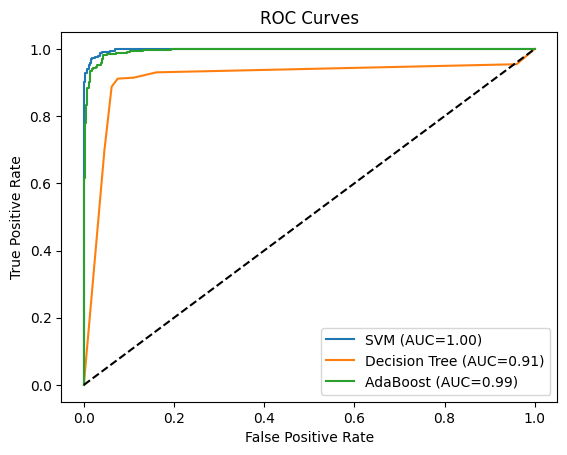

In [120]:
# Evaluate on validation set

models = {'SVM': svm_grid_search.best_estimator_, 'Decision Tree': dt_grid_search.best_estimator_, 'AdaBoost': ada_grid_search.best_estimator_}

for name, model in models.items():
    preds = model.predict(X_val)
    probs = model.predict_proba(X_val)[:,1]
    print(f"{name} Classification Report:")
    print(classification_report(y_val, preds))
    cm = confusion_matrix(y_val, preds)
    print(f"Confusion Matrix:\n{cm}")
    roc_auc = roc_auc_score(y_val, probs)
    print(f"ROC AUC: {roc_auc}\n")

# Plot ROC curves
plt.figure()
for name, model in models.items():
    probs = model.predict_proba(X_val)[:,1]
    fpr, tpr, _ = roc_curve(y_val, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_val, probs):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



CNN Confusion matrix:
 [[354  19]
 [ 35 338]]

LSTM Confusion matrix:
 [[204 169]
 [ 57 316]]

RNN Confusion matrix:
 [[369   4]
 [ 55 318]]


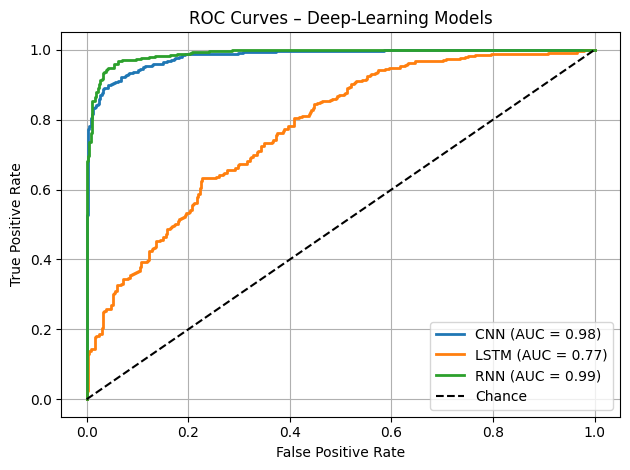

In [121]:
import torch
import numpy as np                      # ← you need this for np.array
from sklearn.metrics import (confusion_matrix,
                             roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


cnn_model  = CNNClassifier (len(vocab), EMBED_DIM, 2, emb_matrix)
lstm_model = LSTMClassifier(len(vocab), EMBED_DIM, 128, 2, emb_matrix)
rnn_model  = RNNClassifier (len(vocab), EMBED_DIM, 128, 2, emb_matrix)  


#  Load the saved weights

cnn_model.load_state_dict (torch.load("../models/cnn_model.pkl",  map_location="cpu"))
lstm_model.load_state_dict(torch.load("../models/lstm_model.pkl", map_location="cpu"))
rnn_model.load_state_dict (torch.load("../models/rnn_model.pkl",  map_location="cpu"))

cnn_model.eval(); lstm_model.eval(); rnn_model.eval()


dl_models = {
    "CNN" : cnn_model,
    "LSTM": lstm_model,
    "RNN" : rnn_model      # keep the same variable name you created
}


def predict_dl(model, loader):
    model.to(DEVICE).eval()
    y_true, y_pred, y_prob = [], [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(DEVICE)
            logits = model(xb)
            probs  = torch.softmax(logits, 1)[:, 1]
            y_true.extend(yb.numpy())
            y_pred.extend(logits.argmax(1).cpu().numpy())
            y_prob.extend(probs.cpu().numpy())
    return np.array(y_true), np.array(y_pred), np.array(y_prob)

# ------------------------------------------------------------------
# 4. Confusion matrices + ROC curves
# ------------------------------------------------------------------
plt.figure()

for name, model in dl_models.items():
    y_true, y_pred, y_prob = predict_dl(model, val_loader)

    # → Confusion matrix
    print(f"\n{name} Confusion matrix:\n", confusion_matrix(y_true, y_pred))

    
for name, model in dl_models.items():
    y_true, _, y_prob = predict_dl(model, val_loader)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc = roc_auc_score(y_true, y_prob)
    plt.plot(fpr, tpr, linewidth=2, label=f"{name} (AUC = {auc:.2f})")

# chance line
plt.plot([0,1], [0,1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Deep-Learning Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


## VII : Final Predictions and results

In [ ]:
# saving Predictions to csv file.

best_model = svm_grid_search.best_estimator_
df_test['label'] = best_model.predict(df_test['essay'])  
output = df_test[['essay', 'label']]
output.to_csv('./kwesi_danso_assignment_2_R11965154.csv', index=False)
print('Predictions saved to ./kwesi_danso_assignment_2_R11965154.csv')




Predictions saved to ./kwesi_danso_assignment_2_R11965154.csv


## ADDITIONAL BONUS  TASKS

# Task 1: Advanced pipeline features.

In [ ]:


# A custom transformer to handle preprocessing
class NLTKPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        processed = []
        for doc in X:
            if not isinstance(doc, str):
                doc = ""
            doc = remove_stopwords(doc)
            tokens = doc.split()
            tokens = preprocess_lematise(tokens)
            processed.append(" ".join(tokens))
        return processed





In [ ]:
# Define a pipeline for preprocessing ,vectoriztaion and the classifier.
preprocess_pipeline = Pipeline([
    ('preprocessor', NLTKPreprocessor()),                   # Custom preprocessing
    ('vectorizer', TfidfVectorizer()),                      # TF-IDF vectorization   
    ('classifier', SVC(probability=True, random_state=42))  # Classifier
])

# Fit the pipeline
preprocess_pipeline.fit(X_train, y_train)

# Evaluate on validation data
accuracy = preprocess_pipeline.score(X_val,y_val)
print(f"Pipeline Accuracy with NLTKPreprocessor: {accuracy:.4f}")



Pipeline Accuracy with NLTKPreprocessor: 0.9517


# Task 2 : Ensemble methods

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('svm', svm_grid_search.best_estimator_), 
        ('dt', dt_grid_search.best_estimator_)
    ],
    voting='soft'  # Uses predicted probabilities
)

voting_clf.fit(X_train, y_train)
print('The voting ensemble accuracy is :', voting_clf.score(X_val, y_val))



The voting ensemble accuracy is : 0.9289544235924933


# Task 3: Integrating a feature extraction method into pipeline

In [ ]:
# Integrating feature extraction into pipeline

fs_pipeline = Pipeline([
    ('preprocess', NLTKPreprocessor()),                  # Custom preprocessor class
    ('vectorizer', TfidfVectorizer()),                   # TF-IDF
    ('selector', SelectKBest(score_func=chi2, k=1000)),  # Feature selection
    ('classifier', SVC(probability=True, random_state=42))  # Classifier
])

# Train pipeline
fs_pipeline.fit(X_train, y_train)

# Evaluate
accuracy = fs_pipeline.score(X_val, y_val)
print(f"SelectKBest pipeline accuracy: {accuracy:.4f}")

SelectKBest pipeline accuracy: 0.9745


In [ ]:
model = joblib.load('../models/adaBoost_model.pkl')
print(model)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 3))),
                ('classifier', AdaBoostClassifier(n_estimators=200))])
